In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('final_dataset.csv')  


In [8]:
X = data.drop('Exercise Recommendation Plan', axis=1)  # Features
y = data['Exercise Recommendation Plan']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
numerical_features = ['Weight', 'Height', 'BMI', 'Age']
categorical_features = ['Gender', 'BMIcase']

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [16]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [18]:
y_train_encoded = pd.get_dummies(y_train).values
y_test_encoded = pd.get_dummies(y_test).values

In [20]:
model = keras.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05)),  # Increased L2 Regularization
    layers.Dropout(0.4),  # Increased Dropout Rate
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05)),  # Increased L2 Regularization
    layers.Dropout(0.4),  # Increased Dropout Rate
    layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05)),  # Increased L2 Regularization
    layers.Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer for multi-class
])


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [26]:
history = model.fit(X_train_processed, y_train_encoded, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2473 - loss: 5.4701 - val_accuracy: 0.6086 - val_loss: 3.4121
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5158 - loss: 3.0536 - val_accuracy: 0.6829 - val_loss: 2.0234
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6464 - loss: 1.9648 - val_accuracy: 0.8800 - val_loss: 1.4432
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 1.4855 - val_accuracy: 0.8843 - val_loss: 1.1911
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7743 - loss: 1.2937 - val_accuracy: 0.8843 - val_loss: 1.0559
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 1.1981 - val_accuracy: 0.9014 - val_loss: 0.9781
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 1.1136 - val_accuracy: 0.9443 - val_loss: 0.9177
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 1.0465 - val_accuracy: 0.9443 - v

In [28]:
loss, accuracy = model.evaluate(X_test_processed, y_test_encoded)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9503 - loss: 0.4486
Test Loss: 0.4342, Test Accuracy: 0.9613


In [32]:
model.save('my_model.keras')

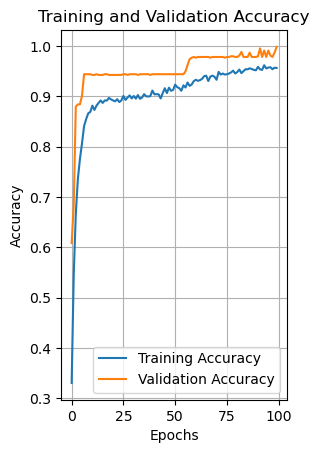

In [38]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()